In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<br><br>
<font size='6'><b>Deep Learning
</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        By Suhyun Kim<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

## 1. Convolution Neural Networks

### 1.1 Convolution Neural Networks

CNNs are simply neural networks that use _convolution_ in place of general matrix multiplication in at least one of their layers

- Discrete convolution can be viewed as multiplication by a matrix

<img src="./image_files/conv_animation.gif" width = 400>

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
<img src="./image_files/conv.png" width = 400>
        </td>
        <td width = 48%>
<img src="./image_files/cnn_conv.png" width = 400>
        </td>
    </tr>
</table>

__CNN Structure__

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
<img src="./image_files/layer_of_cnn.png" width = 450>
        </td>
        <td width = 48%>
<img src="./image_files/cnn.png" width = 400>
        </td>
    </tr>
</table>

## 2. Convolution Neural Network in TensorFlow

<br>
<img src="./image_files/CNNArchitecture.jpg" width = 750>
<br>

- MNIST example 
- CNN 구조를 이용하여 숫자를 분류하는 네트워크를 구성하는 Example

### 2.1. Import Library

In [2]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 2.2. Load MNIST example

In [3]:
from six.moves import cPickle

mnist = cPickle.load(open('data_files/mnist.pkl', 'rb'))
trainimgs   = mnist.train.images
trainlabels = mnist.train.labels
testimgs    = mnist.test.images
testlabels  = mnist.test.labels
ntrain      = trainimgs.shape[0]
ntest       = testimgs.shape[0]
print ("Packages loaded")

Extracting data_files/train-images-idx3-ubyte.gz
Extracting data_files/train-labels-idx1-ubyte.gz
Extracting data_files/t10k-images-idx3-ubyte.gz
Extracting data_files/t10k-labels-idx1-ubyte.gz
Packages loaded


**Design Neural Network**

- Define Variable
    - 학습 과정에서 필요한 변수 (iteration 횟수, learning rate 등) 정의

- Define Network size
    - Network를 구성하는데 필요한 변수 (hidden layer 수, classes 개수 등) 정의

- Define Weights
    - 학습될 변수(파라미터) 정의
    - Gradient Descent를 통해서 변화될 변수
        - 처음 시작점은 정규분포를 따르는 임의의 값

- Define Network

- Define Cost
    - Neural Net의 output과 label y의 차이가 최소가 되도록 구성

### 2.3. Define Variable
- 학습 과정에서 필요한 변수 (iteration 횟수, learning rate 등) 정의

In [4]:
# Define Variable
'''
batch size
learning rate
n_iter
flag
'''

batch_size = 50
learning_rate = 0.1
n_iter = 2500
flag = 250

### 2.4. Define Network size
- Network를 구성하는데 필요한 변수 (hidden layer 수, classes 개수 등) 정의
- CNN의 경우 convolution의 크기를 함께 정의

- Convolution filter size
<img src="./image_files/conv2.jpg" width = 400>
<br>

In [ ]:
k1_height = 5
k1_width = 5

- Channel
<img src="./image_files/cnn_conv.png" width = 400>
<br>

In [ ]:
k1_channel = 3

- Downsampling
<img src="./image_files/Max_pooling_image.jpg" width = 400>

In [ ]:
k1_pool_height = 2
k1_pool_width = 2

In [5]:
# Define Network size

'''
input shape
convolution kernel size
channel
hidden layer 개수
'''
input_height = 28
input_width = 28
input_channel = 1

k1_height = 5
k1_width = 5
k1_channel = 3

k1_pool_height = 2
k1_pool_width = 2

k2_height = 5
k2_width = 5
k2_channel = 3

k2_pool_height = 2
k2_pool_width = 2

# conv_result_size는 fully connected 를 하기위해 convolution 결과를 한줄로 길게만든 것을 의미
conv_result_size = 7*7*k2_channel
n_hidden = 50
n_classes = 10

### 2.5. Define Weights
- 학습될 변수(파라미터) 정의
- Gradient Descent를 통해서 변화될 변수
    - 처음 시작점은 정규분포를 따르는 임의의 값

<img src="./image_files/conv2.jpg" width = 400>

In [6]:
# Define Weights

'''
Network 안에 들어갈 weigth, biases 정의
'''

weights = {
    'conv1_w' : tf.Variable(tf.random_normal([k1_height, k1_width, input_channel, k1_channel], stddev = 0.1)),
    'conv2_w' : tf.Variable(tf.random_normal([k2_height, k2_width, k1_channel, k2_channel], stddev = 0.1)),
    'fc_w' : tf.Variable(tf.random_normal([conv_result_size, n_hidden], stddev = 0.1)),
    'output_w' : tf.Variable(tf.random_normal([n_hidden, n_classes], stddev = 0.1))
}
biases = {
    'conv1_b' : tf.Variable(tf.random_normal([k1_channel], stddev = 0.1)),
    'conv2_b' : tf.Variable(tf.random_normal([k2_channel], stddev = 0.1)),
    'fc_b' : tf.Variable(tf.random_normal([n_hidden], stddev = 0.1)),
    'output_b' : tf.Variable(tf.random_normal([n_classes], stddev = 0.1))
}

### 2.6. Define Network

__1) Convolution layer__

<img src="./image_files/linear_sum.png" width = 320>

<img src="./image_files/conv_animation.gif" width = 400>

- Stride
- Padding

In [10]:
conv1 = tf.nn.conv2d(x, weights['conv1_w'], 
                         strides= [1,1,1,1], 
                         padding = 'SAME')


__2) Nonlinear activation function__

<img src="./image_files/ReLU.png" width = 500>

In [ ]:
conv1 = tf.nn.relu(conv1 + biases['conv1_b'])

__3) Max pooling__
- The maximum of a rectangular neighborhood (max pooling operation)
- Pooling with downsampling
    - reduce the representation size by a factor of 2, which reduces the computational and statistical burden on the next layer

<img src="./image_files/Max_pooling_image.jpg" width = 500>

In [ ]:
conv1 = tf.nn.max_pool(conv1, 
                           ksize = [1, k1_pool_height, k1_pool_width, 1], 
                           strides = [1, k1_pool_height, k1_pool_width, 1], 
                           padding ='SAME')

__4) Classification__

<img src="./image_files/classification.png" width = 450>

In [ ]:
output_layer = tf.matmul(hidden, weights['output_w']) + biases['output_b']

<br>
<img src="./image_files/CNNArchitecture.jpg" width = 750>
<br>

In [8]:
# Define Network
def net(x, weights, biases):
    #first conv filter layer
    conv1 = tf.nn.conv2d(x, weights['conv1_w'], 
                         strides= [1,1,1,1], 
                         padding = 'SAME')
    #first activate layer
    conv1 = tf.nn.relu(conv1 + biases['conv1_b'])
    #first max pooling layer
    conv1 = tf.nn.max_pool(conv1, 
                           ksize = [1, k1_pool_height, k1_pool_width, 1], 
                           strides = [1, k1_pool_height, k1_pool_width, 1], 
                           )
    
    #second conv filter layer
    conv2 = tf.nn.conv2d(conv1, weights['conv2_w'], 
                         strides= [1,1,1,1], 
                         padding = 'SAME')
    #second activate layer
    conv2 = tf.nn.relu(conv2 + biases['conv2_b'])
    #second max pooling layer
    conv2 = tf.nn.max_pool(conv2, 
                           ksize = [1, k2_pool_height, k2_pool_width, 1], 
                           strides = [1, k2_pool_height, k2_pool_width, 1], 
                           )

    shape = conv2.get_shape().as_list()
    
    # fully connected layer
    conv_result = tf.reshape(conv2, [-1, shape[1]*shape[2]*shape[3]])
    hidden = tf.matmul(conv_result, weights['fc_w']) + biases['fc_b']
    hidden = tf.nn.relu(hidden)
    
    output_layer = tf.matmul(hidden, weights['output_w']) + biases['output_b']
    
    return output_layer

### 2.7. Define Cost
- Neural Net의 output과 label y의 차이가 최소가 되도록 구성

In [ ]:
# Define Cost

x = tf.placeholder(tf.float32, [None, input_width, input_height, input_channel])
y = tf.placeholder(tf.float32, [None, n_classes])

In [9]:
pred = net(x, weights, biases)
cost = tf.reduce_mean(tf.square(pred - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

- 지금까지 만든 Tensor Graph
<br>
<img src="./image_files/NN_graph.png" width = 300>
<br>

### 2.8. Optimize

In [ ]:
# Optimize 
init = tf.initialize_all_variables()
sess = tf.Session()

sess.run(init)

# Training cycle
for epoch in range(n_iter):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    batch_x = np.reshape(batch_x, [-1, input_width, input_height, input_channel])
    sess.run(optimizer, feed_dict={x: batch_x,  y: batch_y})
    c = sess.run(cost, feed_dict={x: batch_x,  y: batch_y})
    if epoch % flag == 0:
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))

### 2.9. Test

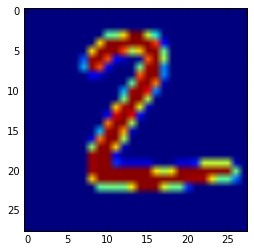

In [12]:
test_x, test_y = mnist.test.next_batch(1)

plt.imshow(test_x.reshape(28, 28))
plt.show()

In [13]:
test_x = np.reshape(test_x, [-1, input_width, input_height, input_channel])
predict_x = sess.run(pred, feed_dict={x: test_x})
print (np.argmax(predict_x, 1)[0])

2


In [11]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>